# Практическая работа №5: Исследование результатов фильтрации дискретного сигнала с помощью нерекурсивных фильтров, построенных на основе полиномиальных приближений

Выполнили студенты гр. 0383 Желнин Максим, Рудакова Юлия и Петровская Евгения. Вариант №17.

## Цель работы

Получение практических навыков выполнения фильтрации дискретных последовательностей с помощью полиномиальных фильтров, а также анализа получаемых результатов с помощью дискретного преобразования Фурье (ДПФ).

## Основные теоретические положения

Спектр дискретного сигнала:

$$S(\omega)=\displaystyle\sum_{k}x_k e^{-i\omega k}$$

С помощью Спектра возможно анализировать амплитудно-частотную характеристику сигнала в частотной области. Для получения данной формулы используются дискретные преобразования Фурье. Этот метод обладает такими свойствами, как линейность, стационарность, симметрия и обратимость. Кроме того, можно использовать произведение сигналов для получения нового сигнала с помощью формулы $z(k)=x(k) \cdot y(k)$, откуда следует, что $Z(n)$ можно вычислить как $\frac{1}{N}\displaystyle\sum_{k}^{N-1} X(k)\cdot Y(n-k)$.

Дискретный фильтр - это система обработки дискретного сигнала, которая имеет свойства линейности и стационарности. Фильтры сглаживания широко используются для удаления скачкообразных изменений из сигнала. Ступенчатый сигнал содержит высокочастотные составляющие из-за множества резких, но небольших по амплитуде, перепадов уровня, которых нет в сглаженном сигнале.

#### Дискретное преобразование Фурье
Пусть ${x_t}$ периодическая последовательность отсчётов с периодом $N$, такая что $x_{t+N} = x_t$ при всех $t$

Дискретная функция:
$$s(k) = \sum_{t=-\infty}^{\infty} x_t \delta(k - tT)$$
будет иметь период NT, где T - период дискретизации.

$s(k)$ — периодическая функция, следовательно можно разложить её в ряд Фурье с коэффициентами:
$$X(n) = \sum_{t=0}^{N-1} x_t e^{-i\frac{2\pi n}{N}t}, n = 0,1,2,...,N-1$$
Обратной дискретное преобразование Фурье:
$$x_t = \frac{1}{N} \sum_{n=0}^{N-1} X(n) e^{i\frac{2\pi t}{N}n}, t=0,1,2,...,N-1$$


## Постановка задачи

Для заданного дискретного сигнала применить фильтры, основанные на сглаживании полиномами. Полученные результаты содержательно проинтерпретировать.

## Выполнение работы

**1. Сформировать дискретный сигнал посредством дискретизации с шагом $T = 1$ непрерывного сигнала, представляющего собой линейную комбинацию косинусоид вида $A_k cos(\omega_k t + \varphi_k)$. Частота каждой из гармоник не должна превышать $\pi$. Всего одиннадцать гармоник с упорядоченными по возрастанию частотами от 0 до $\pi$, изменяющимися с шагом $\varDelta \omega = 0.1\pi$. Амплитуды гармоник $A_k$ представляют собой целые числа со значениями от 1 до 11, определяемые случайным образом с помощью датчика равномерно распределенных случайных чисел. При необходимости нормализовать коэффициенты линейной комбинации посредством деления их на сумму полученных случайным образом амплитуд. Начальные фазы $\varphi_k$ представляют собой случайные числа в промежутке от 0 до 0.5. Дискретная последовательность должна включать в себя 32 отсчета ($N = 31$).**

Аналоговый сигнал:

$$s(t) = \displaystyle\sum_{k=0}^{10} A_k \cdot cos(\omega_kt+\varphi_k)$$

Из него фомируется дискретный сигнал


In [296]:
import random
import statistics
import numpy as np
import matplotlib.pyplot as plt

In [297]:
analog_total = 256
discrete_total = 32
analog_step = discrete_total / analog_total
analog_rate = analog_total // discrete_total
discrete_step = 1
max = 32
min = 0.
A = [random.randint(1, 11) for i in range(11)]
phi = [random.uniform(0, 0.5) for i in range(11)]
omega = [0.1 * np.pi * i for i in range(11)]
omega_pi = np.linspace(-np.pi, np.pi, discrete_total)
analog_x = np.arange(min, max, analog_step)
analog_y = np.array([min for i in range(analog_total)])

for i in range(11):
  analog_y += A[i]*np.cos(np.array(omega[i]*analog_x) + phi[i])

analog_y /= sum(A)

Далее была проведена дискретизация этого сигнала. Через равные промежутки выбираем 32 точки.

In [298]:
discrete_x = np.arange(min, max, discrete_step)
discrete_y = np.array([analog_y[i * analog_rate] for i in range(discrete_total)])

**2. Визуализировать исходные аналоговый и дискретизированный сигналы.**

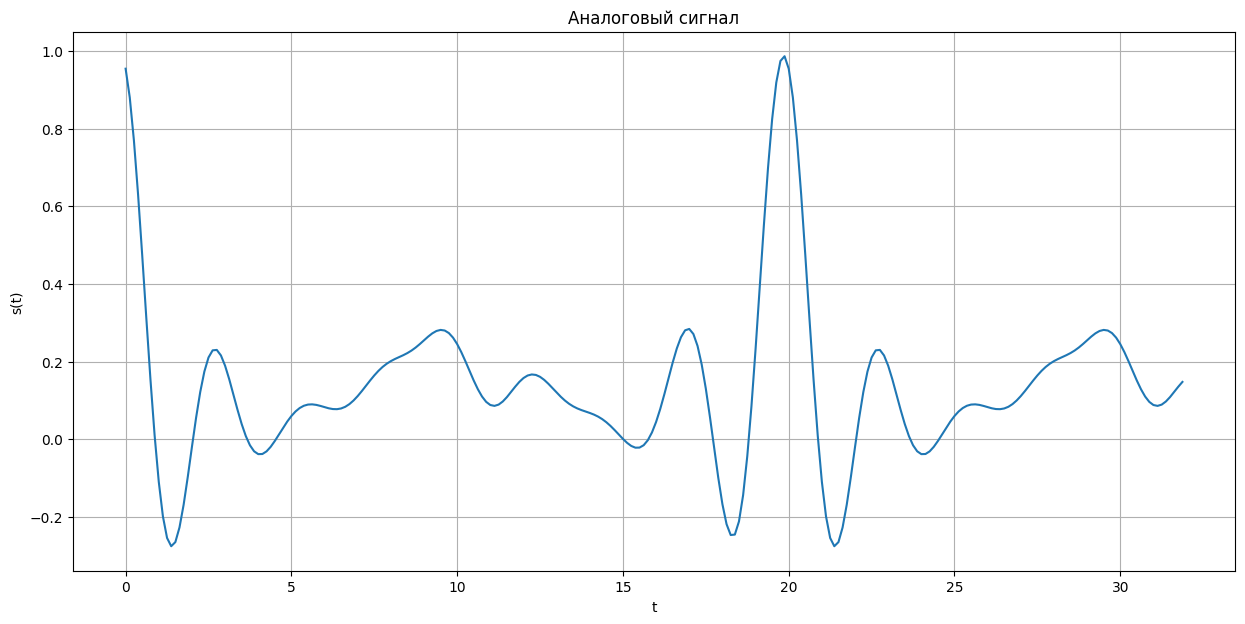

In [299]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Аналоговый сигнал")
plt.ylabel('s(t)')
plt.xlabel('t')
plt.plot(analog_x, analog_y)

<StemContainer object of 3 artists>

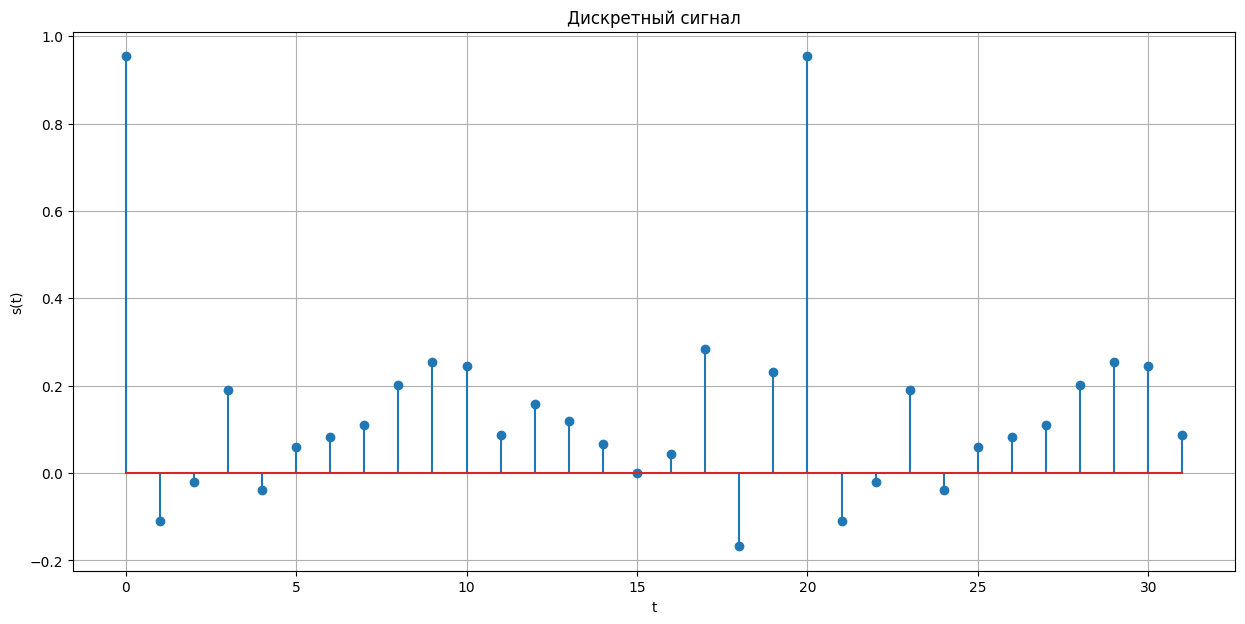

In [300]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Дискретный сигнал")
plt.ylabel('s(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y)

**3. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала и визуализировать их.**

Спектр позволяет узнать, какие косинусоиды были использованы для формирования сигнала и с какой амплитудой. Кроме того, спектр является периодической функцией и симметричен относительно нулевой частоты.

In [301]:
def signal_spectr(omega, y, s = 0):
  for i in range(len(y)):
    s += y[i] * np.exp(-1j * omega * i)
  return s

<StemContainer object of 3 artists>

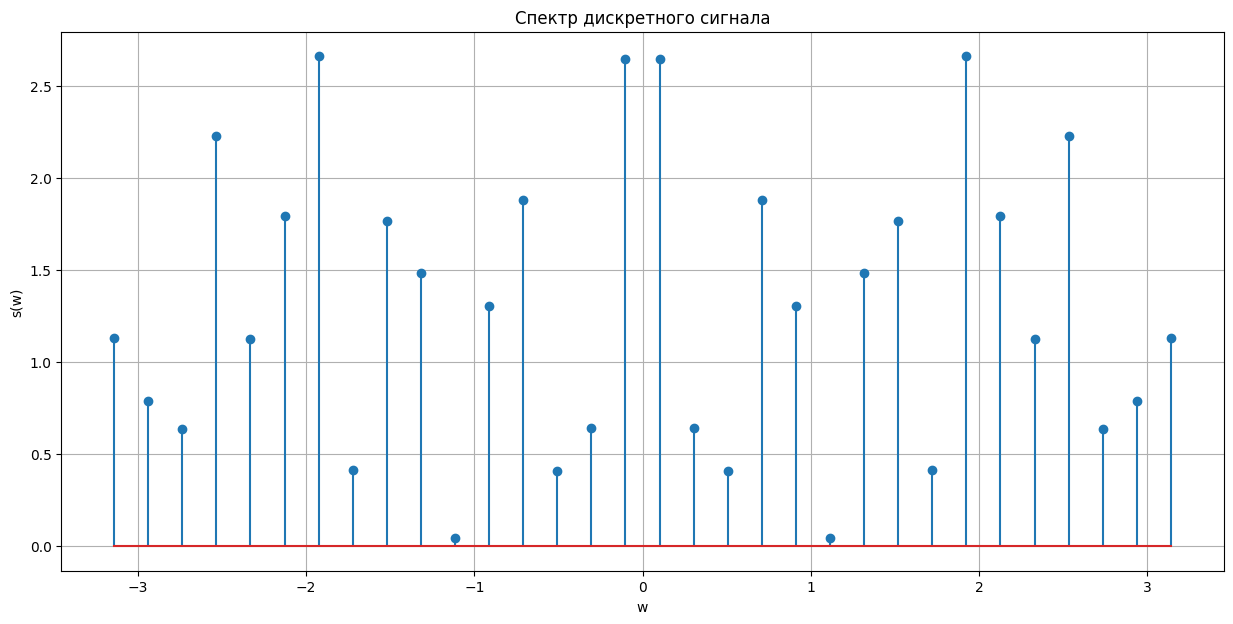

In [302]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Спектр дискретного сигнала")
plt.ylabel('s(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)))

На графике видно, что спектр периодический и симметричен относительно 0.

**4. Для дискретного сигнала применить линейное сглаживание по 5-ти и 9-ти точкам, представить формулу для $H(ω)$ - передаточной функции (частотной характеристики) фильтра.**

Сглаживание по 5-ти точкам:

$$y_n = \frac{s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}}{5}$$

Передаточная функция:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)}{5}$$

Сглаживание по 9-ти точкам:

$$y_n = \frac{s_{n-4}+s_{n-3}+s_{n-2}+s_{n-1}+s_{n}+s_{n+1}+s_{n+2}+s_{n+3}+s_{n+4}}{9}$$

Передаточная функция:

$$H(\omega)=\frac{1+2cos(\omega)+2cos(2\omega)+2cos(3\omega)+2cos(4\omega)}{9}$$

Для областей, где это возможно, применим полученный формулы сглаживания, а для тех, где невозможно, сделаем апроксимацию.

In [303]:
smooth = lambda lambd, diff: np.array([lambd(i, discrete_y) if diff <= i < discrete_total - diff else 0 for i in range(discrete_total)])

coef_linear_5 = lambda i, y: statistics.mean(y[i-2 : i+3])
coef_linear_9 = lambda i, y: statistics.mean(y[i-4 : i+5])

smooth_y_5 = smooth(coef_linear_5, 2)
smooth_y_9 = smooth(coef_linear_9, 4)

discrete_convolve_5 = np.convolve(discrete_y, np.ones(5), 'same') / 5
discrete_convolve_9 = np.convolve(discrete_y, np.ones(9), 'same') / 9

**5. Визуализировать полученный после фильтрации дискретный сигнал совместно с исходным дискретным сигналом.**

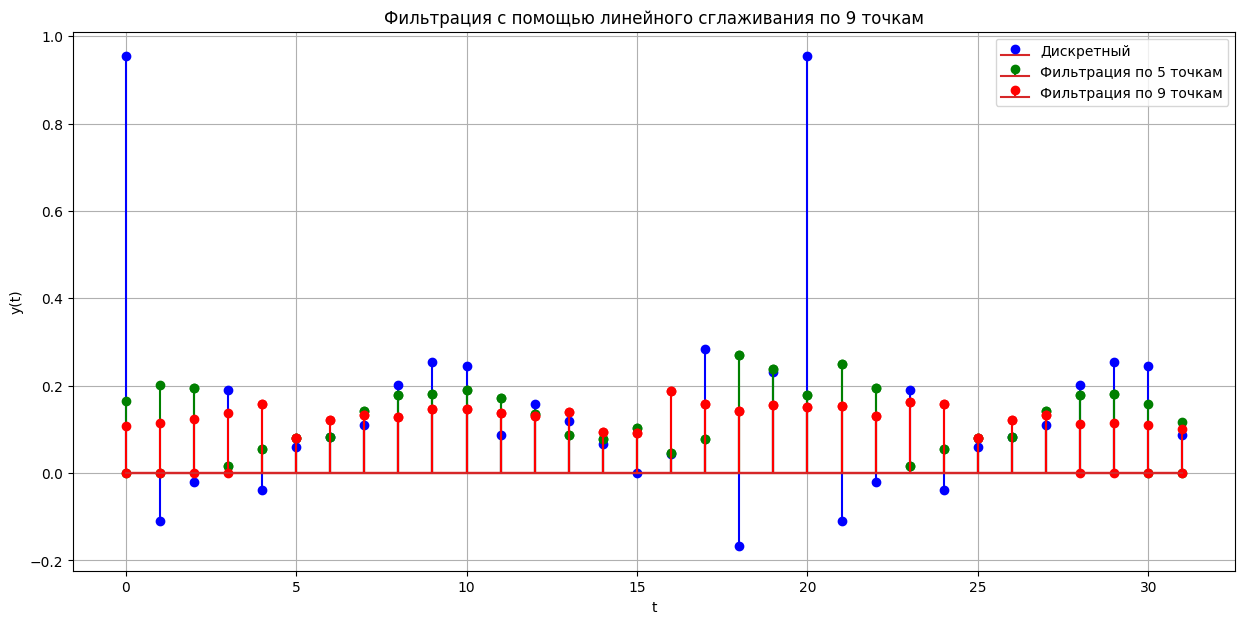

In [304]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Фильтрация с помощью линейного сглаживания по 9 точкам")
plt.ylabel('y(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y, label="Дискретный", linefmt="blue")
plt.stem(discrete_x, discrete_convolve_5, label="Фильтрация по 5 точкам", linefmt="green")
plt.stem(discrete_x, smooth_y_5, linefmt="green")
plt.stem(discrete_x, discrete_convolve_9, label="Фильтрация по 9 точкам", linefmt="red")
plt.stem(discrete_x, smooth_y_9, linefmt="red")
plt.legend()

**6. С помощью ДПФ найти дискретные отсчеты спектра дискретного сигнала после его фильтрации и визуализировать их совместно с отчетами спектра исходного дискретного сигнала.**

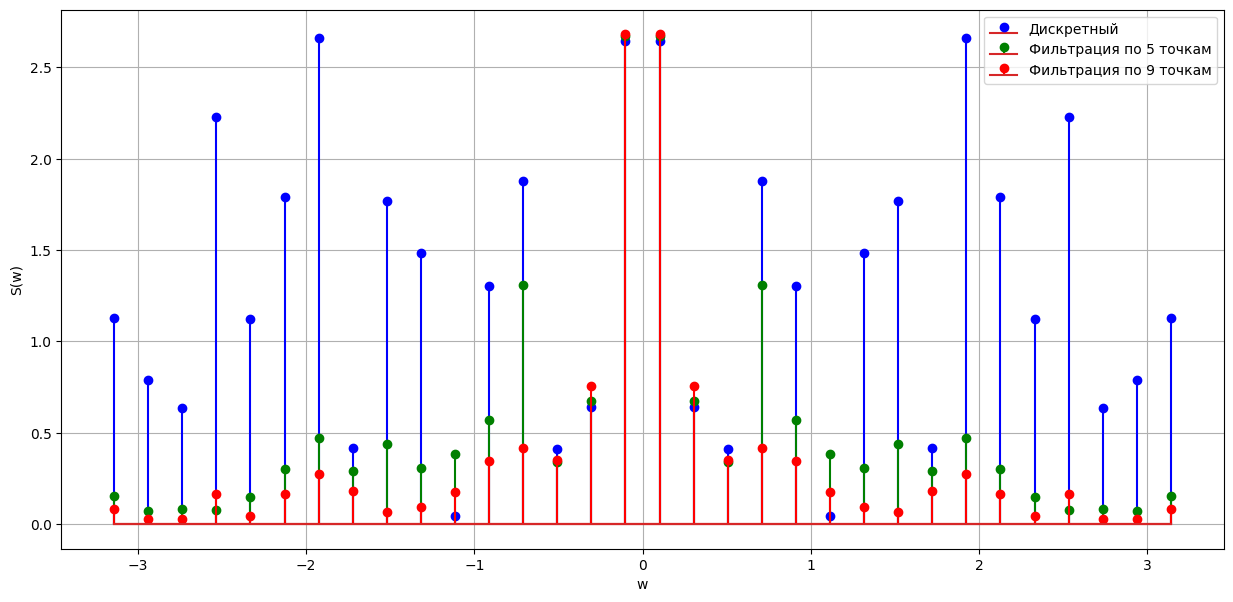

In [305]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.ylabel('S(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)), linefmt="blue", label="Дискретный")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_5)), linefmt="green", label="Фильтрация по 5 точкам")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_9)), linefmt="red", label="Фильтрация по 9 точкам")
plt.legend()

**7. Проанализировать результат на соответствие значениям $H(ω)$. Сделать выводы.**

По графику спектра видно, что чем дальше частотная область от нуля, тем сильнее уменьшенее амплитуды, близко к 0 уменьшенее минимальное. По большей части с увеличением числа точек полоса пропускания становится меньше.

**8.a. Сглаживание полиномом 2-ой степени по 5 и 9 узлам.**

4.

Сглаживание по 5 точкам:

$$y_n = \frac{-3s_{n-2} + 12s_{n-1} + 17s_{n} +12s_{n+1} - 3s_{n+2}}{35}$$

Передаточная функция:

$$H(\omega) = \frac{17 + 24\cos\omega - 6\cos{2\omega}}{35}$$

Сглаживание по 9 точкам:

$$y_n = \frac{-21s_{n-4} + 14s_{n-3} + 39s_{n-2} + 54s_{n-1} + 59s_n + 54s_{n+1} + 39s_{n+2} + 14s_{n+3} - 21s_{n+4}}{231}$$

Передаточная функция:

$$H(\omega)=\frac{59+108cos(\omega)+78cos(2\omega)+28cos(3\omega)-42cos(4\omega)}{231}$$

In [306]:
coef_poli2_5 = lambda i, y: (-3 * y[i-2] + 12 * y[i-1] + 17 * y[i] + 12 * y[i+1] + (-3 * y[i+2])) / 35
coef_poli2_9 = lambda i, y: (-21 * y[i-4] + 14 * y[i-3] + 39 * y[i-2] + 54 * y[i-1] + 59 * y[i] + 54 * y[i+1] + 39 * y[i+2] + 14 * y[i+3] + (-21 * y[i+4])) / 231

smooth_y_5 = smooth(coef_poli2_5, 2)
smooth_y_9 = smooth(coef_poli2_9, 4)

discrete_convolve_5 = np.convolve(discrete_y, np.array([-3, 12, 17, 12, -3]), 'same') / 35
discrete_convolve_9 = np.convolve(discrete_y, np.array([-21, 14, 39, 54, 59, 54, 39, 14,-21]), 'same') / 231

5.

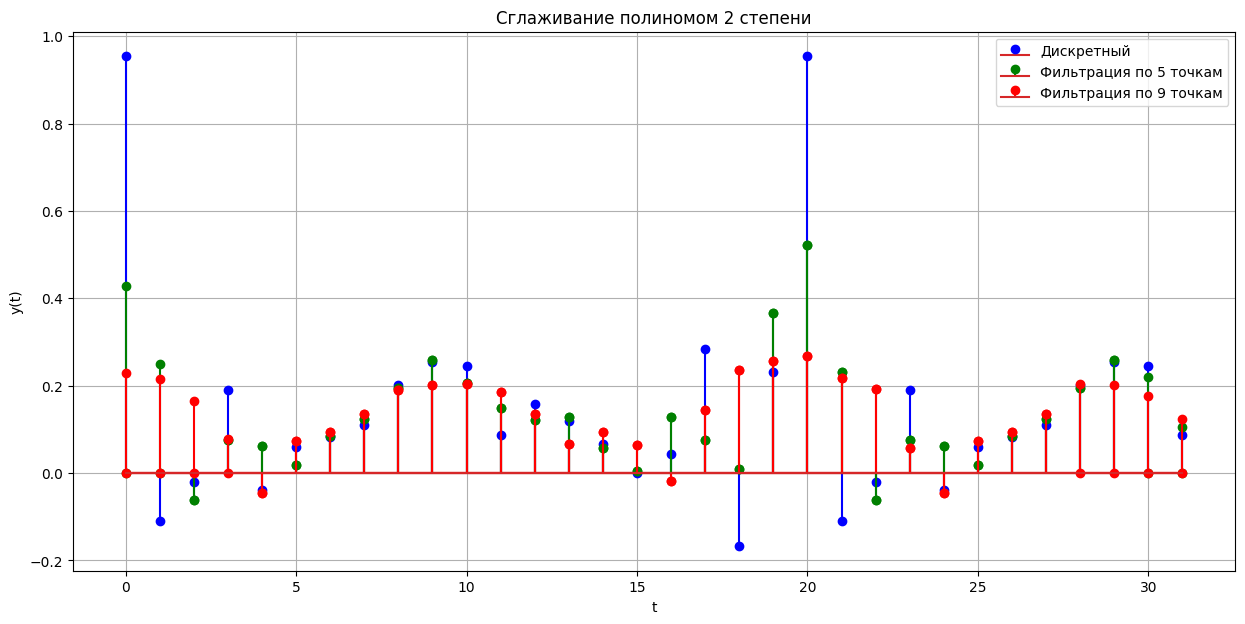

In [307]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Cглаживание полиномом 2 степени")
plt.ylabel('y(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y, linefmt="blue", label="Дискретный")
plt.stem(discrete_x, discrete_convolve_5, linefmt="green", label="Фильтрация по 5 точкам")
plt.stem(discrete_x, smooth_y_5, linefmt="green")
plt.stem(discrete_x, discrete_convolve_9, linefmt="red", label="Фильтрация по 9 точкам")
plt.stem(discrete_x, smooth_y_9, linefmt="red")
plt.legend()

6.

Было использовано преобразование из п.3.

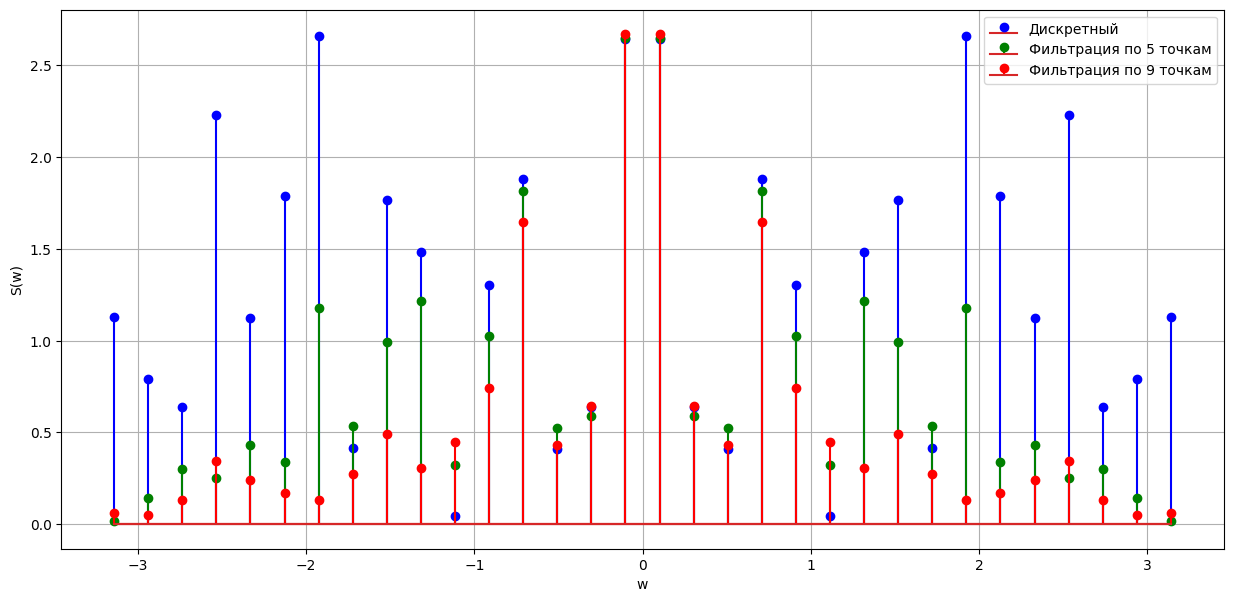

In [308]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.ylabel('S(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)), linefmt="blue", label="Дискретный")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_5)), linefmt="green", label="Фильтрация по 5 точкам")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_9)), linefmt="red", label="Фильтрация по 9 точкам")
plt.legend()

7.

Видно, что полоса пропускания сигнала становится шире, чем в случае с линейным сглаживанием, остальные апмлитуды подавляются сильнее.

**8.b. Сглаживание полиномом 4-ой степени по 7 и 11 узлам.**

4.

Сглаживание по 7 точкам:

$$y_n = \frac{5s_{n-3} - 30s_{n-2} + 75s_{n-1} + 131s_n + 75s_{n+1} - 30s_{n+2} + 5s_{n+3}}{231}$$

Передаточная функция:

$$H(\omega) = \frac{131 + 150cos(\omega) - 60cos(2\omega) + 10cos(3\omega)}{231}$$

Сглаживание по 11 точкам:

$$y_n = \frac{18s_{n-5} - 45s_{n-4} - 10s_{n-3} + 60s_{n-2} + 120s_{n-1} + 143s_n + 120s_{n+1} + 60s_{n+2} - 10s_{n+3} - 45s_{n+4} + 18s_{n+5}}{429}$$

Передаточная функция:

$$H(\omega) = \frac{143 + 240 cos(\omega) + 120 cos(2\omega) − 20 cos(3\omega) - 90 cos(4\omega) + 36 cos(5\omega)}{429}$$

In [309]:
coef_poli4_7 = lambda i, y: (5 * y[i-3] + (-30 * y[i-2]) + 75 * y[i-1] + 131 * y[i] + 75 * y[i+1] + (-30 * y[i+2]) + 5 * y[i+3]) / 231
coef_poli4_11 = lambda i, y: (18 * y[i-5] + (-45 * y[i-4]) + (-10 * y[i-3]) + 60 * y[i-2] + 120 * y[i-1] + 143 * y[i] + 120 * y[i+1] + 60 * y[i+2] + (-10 * y[i+3]) + (-45 * y[i+4]) + 18 * y[i+5]) / 429

smooth_y_7 = smooth(coef_poli4_7, 3)
smooth_y_11 = smooth(coef_poli4_11, 5)

discrete_convolve_7 = np.convolve(discrete_y, np.array([5, -30, 75, 131, 75, -30, 5]), 'same') / 231
discrete_convolve_11 = np.convolve(discrete_y, np.array([18, -45, -10, 60, 120, 143, 120, 60, -10, -45, 18]), 'same') / 429


5.

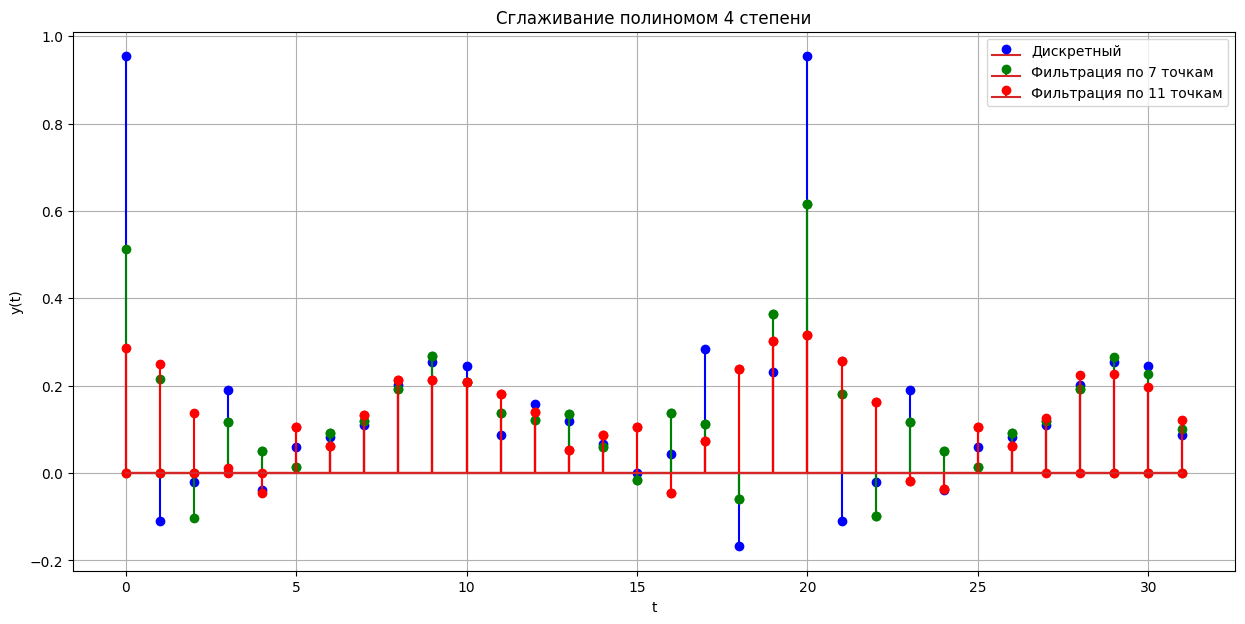

In [310]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.title("Сглаживание полиномом 4 степени")
plt.ylabel('y(t)')
plt.xlabel('t')
plt.stem(discrete_x, discrete_y, linefmt="blue", label="Дискретный")
plt.stem(discrete_x, discrete_convolve_7, linefmt="green")
plt.stem(discrete_x, smooth_y_7, linefmt="green", label="Фильтрация по 7 точкам")
plt.stem(discrete_x, discrete_convolve_11, linefmt="red")
plt.stem(discrete_x, smooth_y_11, linefmt="red", label="Фильтрация по 11 точкам")
plt.legend()

6.

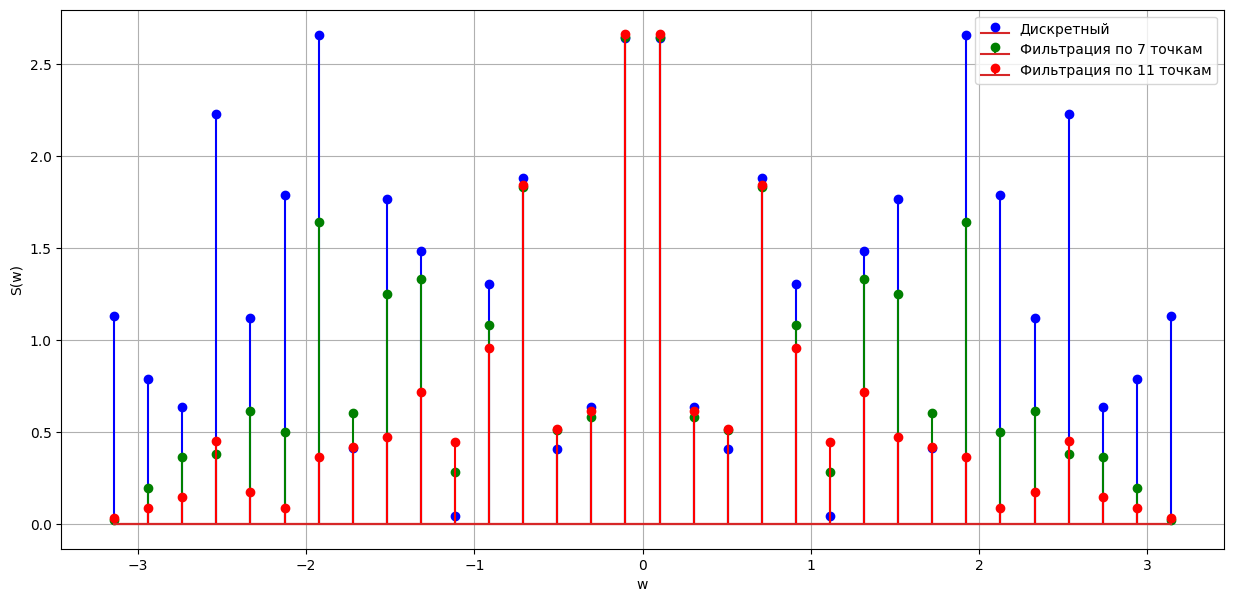

In [311]:
plt.figure(figsize=(15, 7))
plt.grid()
plt.ylabel('S(w)')
plt.xlabel('w')
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_y)), linefmt="blue", label="Дискретный")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_7)), linefmt="green", label="Фильтрация по 7 точкам")
plt.stem(omega_pi, np.abs(signal_spectr(omega_pi, discrete_convolve_11)), linefmt="red", label="Фильтрация по 11 точкам")
plt.legend()

*8.b.7. Анализ результатов.*

Произошло ещё большее раширение полосы пропускания около 0, а при удалении понижение амплитут становится сильнее, так в значениях близким к $\pi$ амплитуда подавляется почти до 0.

## Выводы

В рамках эксперимента был создан аналоговый сигнал, состоящий из нескольких косинусоид, и затем он был преобразован в дискретный вид. После этого был проанализирован спектр сигнала, полученный с помощью дискретного преобразования Фурье. К дискретизированному сигналу были применены фильтры: линейное сглаживание по 5 и 9 точкам, сглаживание полиномом второй степени, также по 5 и 9 точкам, и сглаживание полиномом 4 степени по 7 и 11 точкам. В результате анализа спектров, были получены следующие заключения:

1) Сглаживание делает сигнал более плавным, что помогает исключить неровности и резкие скачки сигнала, также и фильтры помогают убрать резкие перепады амплитуд, что сильно помогает при анализе.

2) Чем выше степень сглаживания, тем шире становится полоса пропускания сигнала на низких частотах, а также тем менее отличными от настоящих остаются значения в этой полосе.

3) При увеличении числа точек наблюдается обратная зависимость с полосой пропускания частот - она уменьшается.